In [1]:
# Hyo Sung Kim and Chin Yee Lee
# MUSA 620 - Final Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Point

In [4]:
# Importing Uber Data

In [169]:
# 2014
uber_apr14 = pd.read_csv("./UberData/uber-raw-data-apr14.csv")
uber_may14 = pd.read_csv("./UberData/uber-raw-data-may14.csv")
uber_jun14 = pd.read_csv("./UberData/uber-raw-data-jun14.csv")
uber_jul14 = pd.read_csv("./UberData/uber-raw-data-jul14.csv")
uber_aug14 = pd.read_csv("./UberData/uber-raw-data-aug14.csv")
uber_sep14 = pd.read_csv("./UberData/uber-raw-data-sep14.csv")

In [170]:
# Combined df should have x rows:
uber_apr14.shape[0]+uber_may14.shape[0]+uber_jun14.shape[0]+uber_jul14.shape[0]+uber_aug14.shape[0]+uber_sep14.shape[0]

4534327

In [351]:
# Combine 2014 data into one dataframe
frames = [uber_apr14, uber_may14, uber_jun14, uber_jul14, uber_aug14, uber_sep14]
uber_2014 = pd.concat(frames)

In [352]:
print(uber_2014.shape)
uber_2014.head()

(4534327, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [353]:
# Rename columns(Date/Time to DateTime)
uber_2014.columns = ['DateTime', 'Lat', 'Lon', 'Base']

In [354]:
# Add Type Column
uber_2014['Type'] = 'Uber'

In [355]:
# Add Hour Column
uber_2014['Hour'] = uber_2014['DateTime'].str[9:]
uber_2014['Hour'] = uber_2014['Hour'].str[:-6]
uber_2014.Hour=uber_2014.Hour.astype(int)

# Check
uber_2014.head()
#uber_2014.Hour.unique()

,DateTime,Lat,Lon,Base,Type,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,Uber,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,Uber,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,Uber,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,Uber,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,Uber,0


In [356]:
uber_2014.head()

,DateTime,Lat,Lon,Base,Type,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,Uber,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,Uber,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,Uber,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,Uber,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,Uber,0


In [357]:
#Add Date Column
date=uber_2014['DateTime'].str.rsplit(" ", n=1, expand=True)
date=date.reset_index()
date['date']=date[0]
date=date[['date']]

date.head()


,date
0,4/1/2014
1,4/1/2014
2,4/1/2014
3,4/1/2014
4,4/1/2014


In [359]:
import datetime as dt
date['date']= date['date'].apply(lambda x:
                                dt.datetime.strptime(x, '%m/%d/%Y'))

In [360]:
date['date']=date['date'].apply(lambda x:
                                dt.datetime.strftime(x,'%m/%d/%Y'))
#d.strftime('%d-%m-%Y')
date.head()

,date
0,04/01/2014
1,04/01/2014
2,04/01/2014
3,04/01/2014
4,04/01/2014


In [361]:
uber_2014=pd.concat([uber_2014.reset_index(drop=True), date.reset_index(drop=True)], axis=1)
uber_2014.head()

,DateTime,Lat,Lon,Base,Type,Hour,date
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,Uber,0,04/01/2014
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,Uber,0,04/01/2014
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,Uber,0,04/01/2014
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,Uber,0,04/01/2014
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,Uber,0,04/01/2014


In [362]:
# Select Columns of Interest
uber_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour', 'date']
uber_2014 = uber_2014[uber_cols]

In [363]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour,date
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014


In [364]:
# Create Month Column
uber_2014['Month']=uber_2014['DateTime'].str[0]
uber_2014.Month=uber_2014.Month.astype(int)

# Check
uber_2014.head()
#uber_2014.Month.unique()

,DateTime,Lat,Lon,Type,Hour,date,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014,4
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014,4
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014,4
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014,4
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014,4


In [365]:
# Create Month Name Column
uber_2014.loc[uber_2014.Month == 4,'MonthName'] = 'April'
uber_2014.loc[uber_2014.Month == 5,'MonthName'] = 'May'
uber_2014.loc[uber_2014.Month == 6,'MonthName'] = 'June'
uber_2014.loc[uber_2014.Month == 7,'MonthName'] = 'July'
uber_2014.loc[uber_2014.Month == 8,'MonthName'] = 'August'
uber_2014.loc[uber_2014.Month == 9,'MonthName'] = 'September'

In [366]:
# Check
uber_2014.head()
#uber_2014.MonthName.unique()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014,4,April


In [22]:
# Import NYC Taxi data via API call
    # not using Green cab data (for now)

In [222]:
import requests
import json

In [223]:
#!pip install sodapy
from sodapy import Socrata

In [25]:
# If API Token is needed:

#Name: NYC_Picks
#Description: MUSA620-Project
#App Token: Jh3PX6F3BDgnCmENslklEj3iZ

In [367]:
#takes about +/- 5~10 minutes
#source: https://dev.socrata.com/foundry/data.cityofnewyork.us/gkne-dk5s

# Unauthenticated client only works with public data sets. Note 'None' in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Get 4.5M results (~similar to uber_2014), returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("gkne-dk5s", select="vendor_id, pickup_datetime, pickup_longitude, pickup_latitude",where="pickup_datetime between '2014-04-01T00:00:00.000' and '2014-10-01T00:00:00.000'",limit=4500000)


# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [368]:
taxi_2014 = results_df

In [369]:
taxi_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,vendor_id
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,VTS
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,CMT
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,VTS
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,CMT
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,CMT


In [370]:
# Rename columns(Date/Time to DateTime)
taxi_2014.columns = ['DateTime', 'Lat', 'Lon', 'Vendor_ID']

In [371]:
# Add Type Column
taxi_2014['Type'] = 'Taxi'

In [372]:
# Add Hour Column
taxi_2014['Hour'] = taxi_2014['DateTime'].str[11:13]
taxi_2014.Hour=taxi_2014.Hour.astype(int)

# Check
taxi_2014.head()
#taxi_2014.Hour.unique()

,DateTime,Lat,Lon,Vendor_ID,Type,Hour
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,VTS,Taxi,21
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,CMT,Taxi,13
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,VTS,Taxi,18
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,CMT,Taxi,16
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,CMT,Taxi,19


In [373]:
# Select Columns of Interest
taxi_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour']
taxi_2014 = taxi_2014[taxi_cols]

taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,Taxi,21
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,Taxi,13
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,Taxi,18
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,Taxi,16
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,Taxi,19


In [374]:
#Add Date Column
date=taxi_2014['DateTime'].str.rsplit("T", n=1, expand=True)
date=date.reset_index()
date['date']=date[0]
date=date[['date']]

date.head()

,date
0,2014-05-01
1,2014-08-01
2,2014-04-26
3,2014-08-22
4,2014-08-11


In [375]:
import datetime as dt
date['date']= date['date'].apply(lambda x:
                                dt.datetime.strptime(x, '%Y-%m-%d'))
date.head()

,date
0,2014-05-01
1,2014-08-01
2,2014-04-26
3,2014-08-22
4,2014-08-11


In [376]:
date['date']=date['date'].apply(lambda x:
                                dt.datetime.strftime(x,'%m/%d/%Y'))
#d.strftime('%d-%m-%Y')
date.head()

,date
0,05/01/2014
1,08/01/2014
2,04/26/2014
3,08/22/2014
4,08/11/2014


In [377]:
taxi_2014=pd.concat([taxi_2014.reset_index(drop=True), date.reset_index(drop=True)], axis=1)
taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,date
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,Taxi,21,05/01/2014
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,Taxi,13,08/01/2014
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,Taxi,18,04/26/2014
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,Taxi,16,08/22/2014
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,Taxi,19,08/11/2014


In [378]:
# Select Columns of Interest
taxi_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour', 'date']
taxi_2014 = taxi_2014[taxi_cols]
taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,date
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,Taxi,21,05/01/2014
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,Taxi,13,08/01/2014
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,Taxi,18,04/26/2014
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,Taxi,16,08/22/2014
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,Taxi,19,08/11/2014


In [379]:
# Create Month Column
taxi_2014['Month']=taxi_2014['DateTime'].str[5:7]
taxi_2014.Month=taxi_2014.Month.astype(int)

# Check
taxi_2014.head()
#taxi_2014.Month.unique()

,DateTime,Lat,Lon,Type,Hour,date,Month
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,Taxi,21,05/01/2014,5
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,Taxi,13,08/01/2014,8
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,Taxi,18,04/26/2014,4
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,Taxi,16,08/22/2014,8
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,Taxi,19,08/11/2014,8


In [380]:
# Create Month Name Column
taxi_2014.loc[taxi_2014.Month == 4,'MonthName'] = 'April'
taxi_2014.loc[taxi_2014.Month == 5,'MonthName'] = 'May'
taxi_2014.loc[taxi_2014.Month == 6,'MonthName'] = 'June'
taxi_2014.loc[taxi_2014.Month == 7,'MonthName'] = 'July'
taxi_2014.loc[taxi_2014.Month == 8,'MonthName'] = 'August'
taxi_2014.loc[taxi_2014.Month == 9,'MonthName'] = 'September'

In [381]:
# Check
taxi_2014.head()
#taxi_2014.MonthName.unique()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,2014-05-01T21:46:00.000,40.762472000000002,-73.965485000000001,Taxi,21,05/01/2014,5,May
1,2014-08-01T13:39:23.000,40.749105999999998,-73.970387000000002,Taxi,13,08/01/2014,8,August
2,2014-04-26T18:13:00.000,40.761932000000002,-73.992945000000006,Taxi,18,04/26/2014,4,April
3,2014-08-22T16:44:57.000,40.788136999999999,-73.976557999999997,Taxi,16,08/22/2014,8,August
4,2014-08-11T19:32:10.000,40.757221999999999,-73.982474999999994,Taxi,19,08/11/2014,8,August


In [28]:
#print(taxi_2014['MonthName'].value_counts())

May          807933
April        798625
June         754387
September    731412
July         715433
August       692206
Name: MonthName, dtype: int64


In [382]:
# Make Lat Lon Columns to Numeric
taxi_2014['Lat']=pd.to_numeric(taxi_2014['Lat'])
taxi_2014['Lon']=pd.to_numeric(taxi_2014['Lon'])

taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,2014-05-01T21:46:00.000,40.762472,-73.965485,Taxi,21,05/01/2014,5,May
1,2014-08-01T13:39:23.000,40.749106,-73.970387,Taxi,13,08/01/2014,8,August
2,2014-04-26T18:13:00.000,40.761932,-73.992945,Taxi,18,04/26/2014,4,April
3,2014-08-22T16:44:57.000,40.788137,-73.976558,Taxi,16,08/22/2014,8,August
4,2014-08-11T19:32:10.000,40.757222,-73.982475,Taxi,19,08/11/2014,8,August


In [74]:
# Check and Compare Uber and Taxi df

In [383]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014,4,April


In [384]:
taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,2014-05-01T21:46:00.000,40.762472,-73.965485,Taxi,21,05/01/2014,5,May
1,2014-08-01T13:39:23.000,40.749106,-73.970387,Taxi,13,08/01/2014,8,August
2,2014-04-26T18:13:00.000,40.761932,-73.992945,Taxi,18,04/26/2014,4,April
3,2014-08-22T16:44:57.000,40.788137,-73.976558,Taxi,16,08/22/2014,8,August
4,2014-08-11T19:32:10.000,40.757222,-73.982475,Taxi,19,08/11/2014,8,August


In [64]:
# Comparing Uber vs Taxi Count Trips Between April - September 2014

In [424]:
# Combine Uber and Taxi

# make copies first
uber_byMonth = uber_2014
taxi_byMonth = taxi_2014

In [425]:
# Append, ignore index
uber_taxi_byMonth = uber_byMonth.append(taxi_byMonth, ignore_index=True)
uber_taxi_byMonth.head()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014,4,April


In [426]:
uber_taxi_cols=['Type', 'date', 'Month', 'Hour']
uber_taxi_byMonth=uber_taxi_byMonth[uber_taxi_cols]
uber_taxi_byMonth.head()

,Type,date,Month,Hour
0,Uber,04/01/2014,4,0
1,Uber,04/01/2014,4,0
2,Uber,04/01/2014,4,0
3,Uber,04/01/2014,4,0
4,Uber,04/01/2014,4,0


In [427]:
uber_taxi_byMonth['dateCount']=0
uber_taxi_byMonth=uber_taxi_byMonth.groupby(['Month','date','Type'])['dateCount'].count()
uber_taxi_byMonth.head()

Month  date        Type
4      04/01/2014  Taxi    25135
                   Uber    14546
       04/02/2014  Taxi    26442
                   Uber    17474
       04/03/2014  Taxi    27218
Name: dateCount, dtype: int64

In [428]:
uber_taxi_byMonth = uber_taxi_byMonth.reset_index()
uber_taxi_byMonth.head()

,Month,date,Type,dateCount
0,4,04/01/2014,Taxi,25135
1,4,04/01/2014,Uber,14546
2,4,04/02/2014,Taxi,26442
3,4,04/02/2014,Uber,17474
4,4,04/03/2014,Taxi,27218


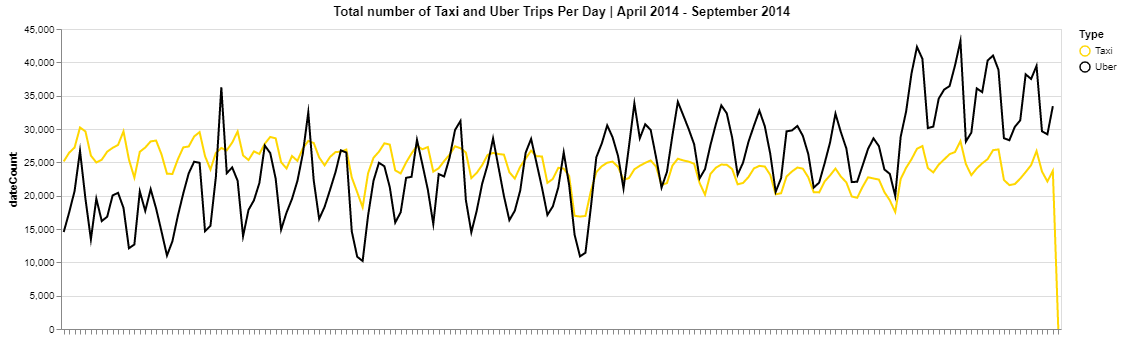

In [450]:
import altair as alt


source = uber_taxi_byMonth

color = alt.Scale(domain=('Taxi', 'Uber'),
                      range=["Gold", "Black"])

slider = alt.binding_range(min=4,
                           max=9,
                           step = 1)
select_Month = alt.selection_single(name="Month", fields=['Month'], bind=slider)

base=alt.Chart(source, title='Total number of Taxi and Uber Trips Per Day | April 2014 - September 2014').encode(
    x=alt.X('date:N', title=None),
    y=alt.Y('dateCount:Q', scale=alt.Scale(domain=(0, 45000))),
    color=alt.Color('Type:N', scale=color),
    tooltip=['Type', 'date', 'dateCount']
).properties(
    width=1000
).add_selection(
    select_Month
).transform_filter(
    select_Month
)

chart1=base.mark_line()

chart1= chart1.configure_axisX(labels=False)
chart1

In [449]:
chart1.save("chart1.html")

In [34]:
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [451]:
uber_byMonth = uber_2014
taxi_byMonth = taxi_2014
uber_taxi_byMonth = uber_byMonth.append(taxi_byMonth, ignore_index=True)
uber_taxi_byMonth.head()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014,4,April


In [153]:
# Workaround: Order by Month Number

In [155]:
# To do:
# Change colors for type
# Add Title
# ...

In [452]:
# Avg Pick Ups by Hour (Counts) - Avg is done later on

# make copies first
uber_byHourC = uber_2014
taxi_byHourC = taxi_2014

In [453]:
# Append, ignore index
uber_taxi_byHourC = uber_byHourC.append(taxi_byHourC, ignore_index=True)
uber_taxi_byHourC.head()

,DateTime,Lat,Lon,Type,Hour,date,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,04/01/2014,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,04/01/2014,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,04/01/2014,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,04/01/2014,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,04/01/2014,4,April


In [454]:
uber_taxi_byHourC.shape

(9034327, 8)

In [455]:
# Groupby Hour and Type to get Hourly pickup counts for each type of transportation
uber_taxi_byHourC['HourCount']=0
uber_taxi_byHourC=uber_taxi_byHourC.groupby(['Hour','Type'])['HourCount'].count()
uber_taxi_byHourC.head()

Hour  Type
0     Taxi    181583
      Uber    103836
1     Taxi    132462
      Uber     67227
2     Taxi     97602
Name: HourCount, dtype: int64

In [456]:
# Reset Index
uber_taxi_byHourC = uber_taxi_byHourC.reset_index()
uber_taxi_byHourC.head() #should have 24 hours months, 2 types - total of 48 rows

,Hour,Type,HourCount
0,0,Taxi,181583
1,0,Uber,103836
2,1,Taxi,132462
3,1,Uber,67227
4,2,Taxi,97602


In [457]:
uber_taxi_byHourC['AverageHourCount']=uber_taxi_byHourC.HourCount/183
uber_taxi_byHourC.head()

,Hour,Type,HourCount,AverageHourCount
0,0,Taxi,181583,992.256831
1,0,Uber,103836,567.409836
2,1,Taxi,132462,723.836066
3,1,Uber,67227,367.360656
4,2,Taxi,97602,533.344262


In [460]:
#get the total vehicles by hour
uber_taxi_byHourC_HourTotal=uber_taxi_byHourC.groupby(['Hour'])[['AverageHourCount']].sum()
uber_taxi_byHourC_HourTotal['HourTotal']=uber_taxi_byHourC_HourTotal['AverageHourCount']
uber_taxi_byHourC_HourTotal=uber_taxi_byHourC_HourTotal.reset_index()
uber_taxi_byHourC_HourTotal=uber_taxi_byHourC_HourTotal[['Hour', 'HourTotal']]
uber_taxi_byHourC_HourTotal

,Hour,HourTotal
0,0,1559.666667
1,1,1091.196721
2,2,783.972678
3,3,647.087432
4,4,588.087432
5,5,719.202186
6,6,1326.584699
7,7,1960.420765
8,8,2141.639344
9,9,2011.863388


In [461]:
uber_taxi_byHourC=pd.merge(uber_taxi_byHourC, uber_taxi_byHourC_HourTotal, on='Hour')

In [462]:
uber_taxi_byHourC.head()

,Hour,Type,HourCount,AverageHourCount,HourTotal
0,0,Taxi,181583,992.256831,1559.666667
1,0,Uber,103836,567.409836,1559.666667
2,1,Taxi,132462,723.836066,1091.196721
3,1,Uber,67227,367.360656,1091.196721
4,2,Taxi,97602,533.344262,783.972678


In [465]:
uber_taxi_byHourC['HourProp']=uber_taxi_byHourC.AverageHourCount/uber_taxi_byHourC.HourTotal
uber_taxi_byHourC.head()

,Hour,Type,HourCount,AverageHourCount,HourTotal,HourProp
0,0,Taxi,181583,992.256831,1559.666667,0.636198
1,0,Uber,103836,567.409836,1559.666667,0.363802
2,1,Taxi,132462,723.836066,1091.196721,0.663341
3,1,Uber,67227,367.360656,1091.196721,0.336659
4,2,Taxi,97602,533.344262,783.972678,0.680310


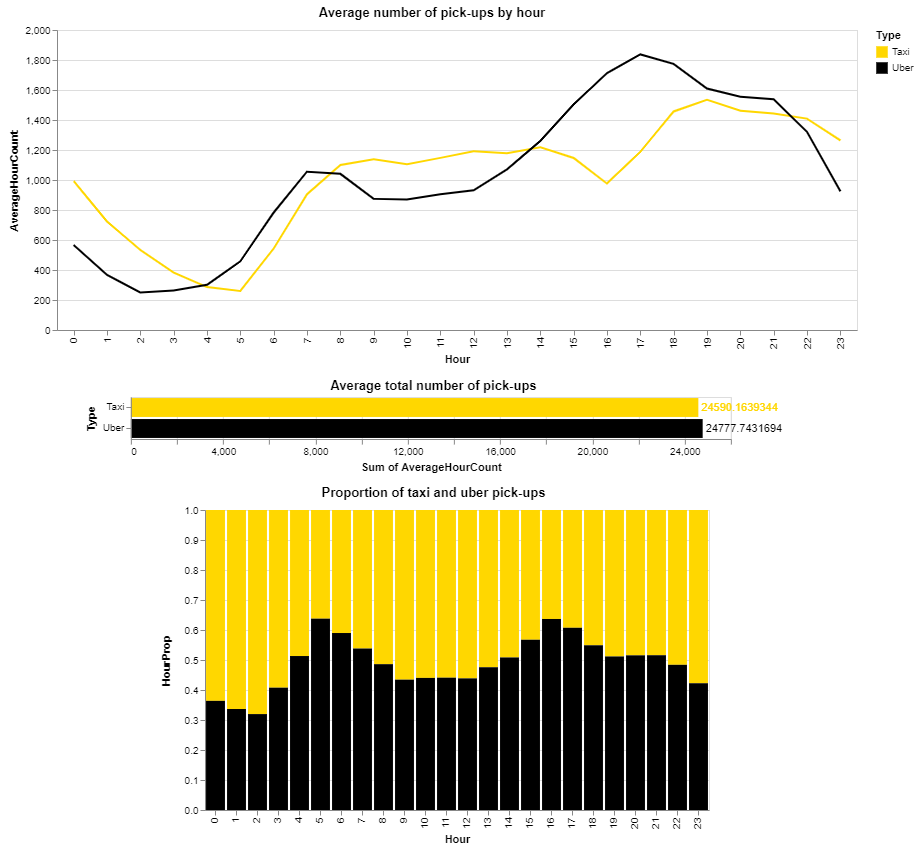

In [471]:
# Line Plot of Pick Up Counts by Hour by Type with Interactive Bar Plot on the bottom
from altair import Chart, Color, Scale

brush = alt.selection(type='interval', encodings=['x'])

# top line graph
points2 = alt.Chart(uber_taxi_byHourC, title='Average number of pick-ups by hour').mark_line().encode(
    Color('Type:N', 
         scale=Scale(domain=['Taxi', 'Uber'], 
                    range=['gold', 'black'])),
    x='Hour:N',
    y='AverageHourCount:Q', 
    #color='Type:N',
    tooltip=['Hour:Q', 'Type:N', 'AverageHourCount:Q']
    
).properties(
    selection=brush,
    width=800
)



# the bottom bar plot 2
bars2 = alt.Chart(title='Average total number of pick-ups').mark_bar().encode(
    y='Type:N',
    color='Type:N',
    x='sum(AverageHourCount):Q'
)

text = bars2.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='sum(AverageHourCount):Q'
)

bars2b=(bars2 + text).properties(width=600).transform_filter(brush.ref())

# the bottom bar plot


bars3= alt.Chart(title='Proportion of taxi and uber pick-ups').mark_bar().encode(
   x="Hour:N",
    y=alt.Y("HourProp:Q", stack="normalize"),
    color="Type:N",
    tooltip=['Hour:Q', 'Type:N', 'HourProp:Q']
).transform_filter(
    brush.ref()
)



chart2 = alt.vconcat(points2, bars2b, bars3, data=uber_taxi_byHourC, center=True) # vertical stacking
chart2

In [472]:
# Save to later embed in HMTL file
chart2.save("chart2.html")

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py bdist_wheel for networkx: started
  Running setup.py bdist_wheel for networkx: finished with status 'done'
  Stored in directory: C:\Users\leech\AppData\Local\pip\Cache\wheels\de\63\64\3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
  Found existing installation: networkx 2.1
    Uninstalling networkx-2.1:
      Successfully uninstalled networkx-2.1
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\leech\\AppData\\Local\\Temp\\pip-uninstall-9_jcpr91\\users\\leech\\anaconda3\\lib\\site-packages\\pandas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# Traffic Data

In [230]:
traffic = pd.read_csv("Traffic_Volume_Counts__2012-2013.csv")

In [231]:
traffic.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76


In [ ]:
# Groupby SegmentID and sum by hourly counts

In [ ]:
# Join by Neighborhoods?
# Fishnet/Hex Bin Map?
# Heat Map?

In [166]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [167]:
taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May
1,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September
2,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August
3,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July
4,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May
